## Rain fall

The datafile contains the amount of rainfall measured in mm per year in de Bilt in the Netherlands.

We try polynomial models of increasing degree.

Demonstration: 
    1. Linear Model
    2. Parameter fit
    3. Evidence to find the best model. 
    4. Confidence region for the fit

Author: Do Kester


import classes

In [1]:
import numpy as numpy
import math

from astropy.io import ascii
from BayesicFitting import PolynomialModel

from BayesicFitting import Fitter
from BayesicFitting import formatter as fmt
from BayesicFitting import plotFit
import matplotlib.pyplot as plt

Read the data. We rescale the data to get "nice" numbers, i.e. the rain into meters, and the year in year-since-2000.

In [2]:
tbl = ascii.read( "data/neerslag.csv" )
year = tbl['col1'].data
rain = tbl['col2'].data
year -= 2000
rain = rain / 1000

Define the model

In [3]:
mdl = PolynomialModel( 0 )
print( mdl )


Polynomial: f( x:p ) = p_0


define the fitter: Fitter

In [4]:
fitter = Fitter( year, mdl )
 
# find the parameters
param = fitter.fit( rain )

  

In [5]:
print( "Parameters :", fmt( param, max=None ) )
print( "StDevs     :", fmt( fitter.stdevs, max=None ) )
print( "Scale      :", fmt( fitter.scale ) )
print( "Evidence   :", fmt( fitter.getEvidence( limits=[-10,10], noiseLimits=[0.01,10] ) ) )


Parameters :     0.781
StDevs     :     0.012
Scale      :     0.121
Evidence   :    26.872


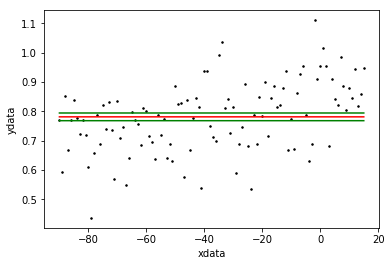

In [6]:
plotFit( year, data=rain, model=mdl, fitter=fitter )

Try higher order polynomials to see which one is best.

Parameters : [    0.847    0.002]
StDevs     : [    0.017    0.000]
Scale      :     0.108
Evidence   :    27.670


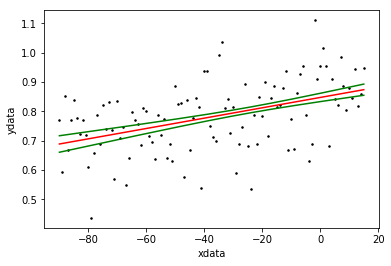

In [7]:
mdl = PolynomialModel( 1 )

fitter = Fitter( year, mdl )
param = fitter.fit( rain )

print( "Parameters :", fmt( param, max=None ) )
print( "StDevs     :", fmt( fitter.stdevs, max=None ) )
print( "Scale      :", fmt( fitter.scale ) )
print( "Evidence   :", fmt( fitter.getEvidence( limits=[-10,10], noiseLimits=[0.01,10] ) ) )

plotFit( year, rain, model=mdl, fitter=fitter )

The logEvidence increased by 0.8 (=27.67-26.87). So the linear model is bettter by a factor 10^0.8 = 6.31.  

Parameters : [    0.855    0.003    0.000]
StDevs     : [    0.018    0.001    0.000]
Scale      :     0.108
Evidence   :    22.221


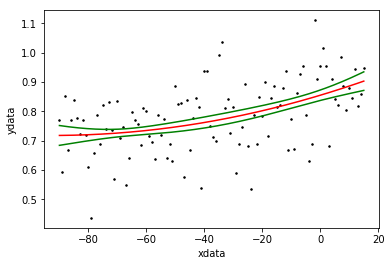

In [8]:
mdl = PolynomialModel( 2 )

fitter = Fitter( year, mdl )
param = fitter.fit( rain )

print( "Parameters :", fmt( param, max=None ) )
print( "StDevs     :", fmt( fitter.stdevs, max=None ) )
print( "Scale      :", fmt( fitter.scale ) )
print( "Evidence   :", fmt( fitter.getEvidence( limits=[-10,10], noiseLimits=[0.01,10] ) ) )

plotFit( year, rain, model=mdl, fitter=fitter )

The logEvidence has gone down again. So this quadratic model is not better than the linear one. The amount of noise in the data prevent us to find better models.